### Importación de datos



In [35]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [36]:
ingreso_tienda1 = tienda1['Precio'].sum()
print(f"Ingreso total tienda 1 = ${ingreso_tienda1:,.2f}")

Ingreso total tienda 1 = $1,150,880,400.00


In [37]:
ingreso_tienda2 = tienda2['Precio'].sum()
print(f"Ingreso total tienda 2 = ${ingreso_tienda2:,.2f}")

Ingreso total tienda 2 = $1,116,343,500.00


In [38]:
ingreso_tienda3 = tienda3['Precio'].sum()
print(f"Ingreso total tienda 3 = ${ingreso_tienda3:,.2f}")

Ingreso total tienda 3 = $1,098,019,600.00


In [39]:
ingreso_tienda4 = tienda4['Precio'].sum()
print(f"Ingreso total tienda 4 = ${ingreso_tienda4:,.2f}")

Ingreso total tienda 4 = $1,038,375,700.00


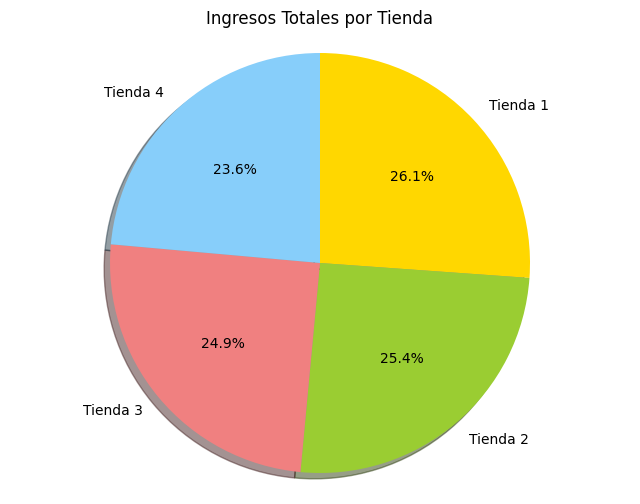

In [40]:
import matplotlib.pyplot as plt

# Datos de ingresos de las tiendas
ingreso_tienda1 = tienda1['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# Etiquetas para cada porción del gráfico
labels = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Tamaños de cada porción
sizes = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]

# Colores para cada porción (opcional)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, counterclock=False)

# Añadir un título
plt.title('Ingresos Totales por Tienda')

# Asegurar que el gráfico sea un círculo
plt.axis('equal')

# Mostrar el gráfico
plt.show()

# 2. Ventas por categoría

In [66]:
def category_analysis(df):
    return df.groupby("Categoría del Producto").agg(
        ventas=("Precio", "sum"),
        envio=("Costo de envío", "sum"),
        precio_prom=("Precio", "mean"),
        pedidos=("Precio", "count")
    ).sort_values("ventas", ascending=False)

cat1 = category_analysis(tienda1)
cat2 = category_analysis(tienda2)
cat3 = category_analysis(tienda3)
cat4 = category_analysis(tienda4)

cat1,cat2, cat3, cat4

(                              ventas       envio   precio_prom  pedidos
 Categoría del Producto                                                 
 Electrónicos             429493500.0  22963700.0  9.586908e+05      448
 Electrodomésticos        363685200.0  19324000.0  1.165658e+06      312
 Muebles                  187633700.0   9994900.0  4.035133e+05      465
 Instrumentos musicales    91299000.0   4883900.0  5.016429e+05      182
 Deportes y diversión      39290000.0   2121100.0  1.383451e+05      284
 Juguetes                  17995700.0    979500.0  5.554228e+04      324
 Artículos para el hogar   12698400.0    643800.0  7.425965e+04      171
 Libros                     8784900.0    467000.0  5.077977e+04      173,
                               ventas       envio   precio_prom  pedidos
 Categoría del Producto                                                 
 Electrónicos             410831100.0  21814200.0  9.735334e+05      422
 Electrodomésticos        348567800.0  18555600.0 

In [41]:
ventas_por_categoria_tienda1 = tienda1.groupby('Categoría del Producto').size().sort_values(ascending=False)
print("Ventas por categoría tienda 1: \n", ventas_por_categoria_tienda1)

Ventas por categoría tienda 1: 
 Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64


In [42]:
sum_tienda1 = ventas_por_categoria_tienda1.sum()
sum_tienda1

np.int64(2359)

In [43]:
ventas_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto').size().sort_values(ascending=False)
print("Ventas por categoría tienda 2: \n", ventas_por_categoria_tienda2)

Ventas por categoría tienda 2: 
 Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64


In [44]:
sum_tienda2 = ventas_por_categoria_tienda2.sum()
sum_tienda2

np.int64(2359)

In [45]:
ventas_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto').size().sort_values(ascending=False)
print("Ventas por categoría tienda 3: \n", ventas_por_categoria_tienda3)

Ventas por categoría tienda 3: 
 Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
dtype: int64


In [46]:
sum_tienda3 = ventas_por_categoria_tienda3.sum()
sum_tienda3

np.int64(2359)

In [47]:
ventas_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto').size().sort_values(ascending=False)
print("Ventas por categoría tienda 4: \n", ventas_por_categoria_tienda4)

Ventas por categoría tienda 4: 
 Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes                   338
Deportes y diversión       277
Electrodomésticos          254
Artículos para el hogar    201
Libros                     187
Instrumentos musicales     170
dtype: int64


In [48]:
sum_tienda4 = ventas_por_categoria_tienda4.sum()
sum_tienda4

np.int64(2358)

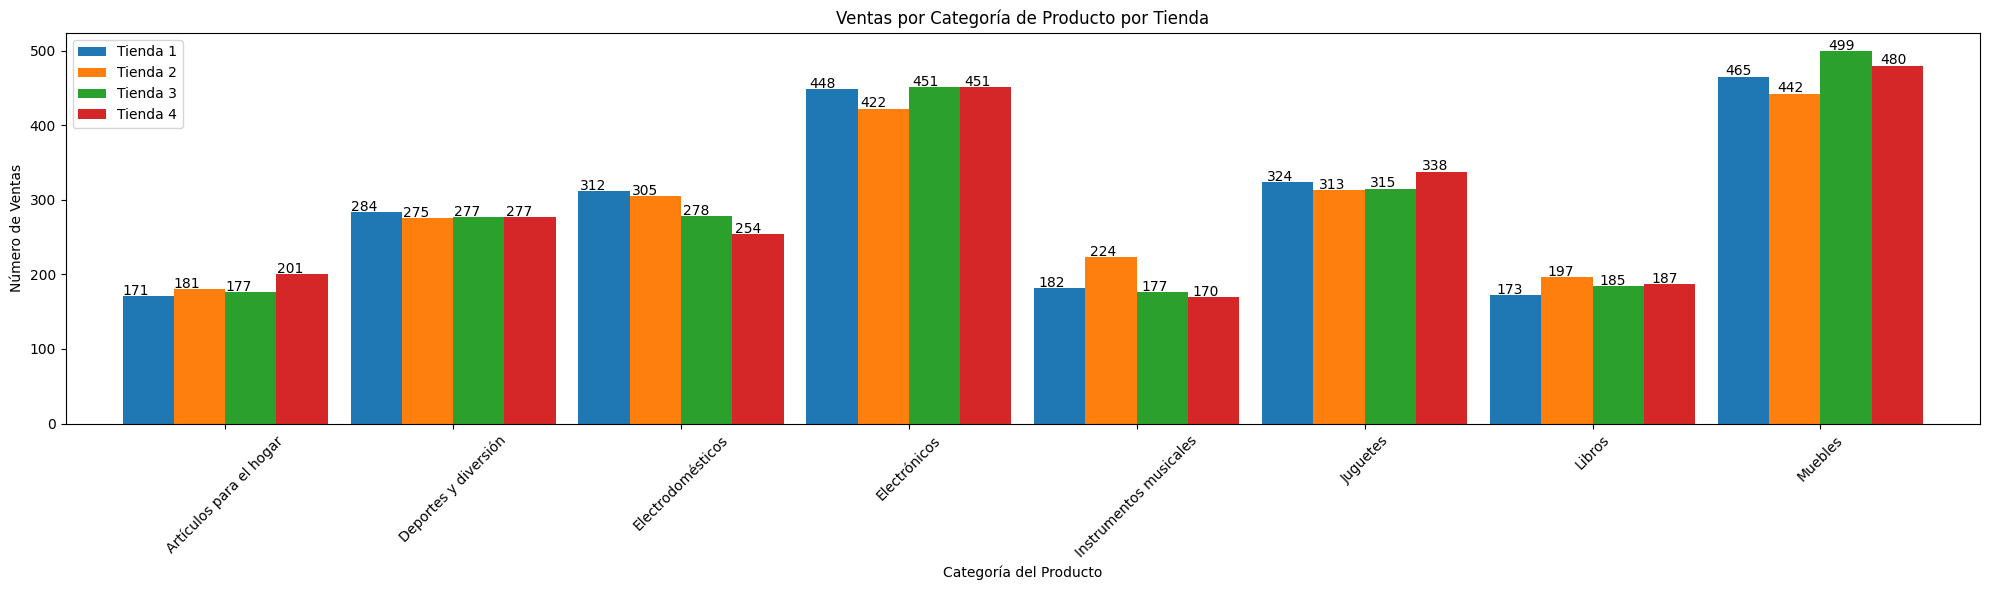

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({
    'Tienda 1': ventas_por_categoria_tienda1,
    'Tienda 2': ventas_por_categoria_tienda2,
    'Tienda 3': ventas_por_categoria_tienda3,
    'Tienda 4': ventas_por_categoria_tienda4
})


ax= df.plot(kind='bar', figsize=(20, 6), width=0.9)
plt.title('Ventas por Categoría de Producto por Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Número de Ventas')
plt.xticks(rotation=45)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


plt.show()

# 3. Calificación promedio de la tienda


In [50]:
tiendas = {'Tienda 1': tienda1, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

for nombre_tienda, tienda in tiendas.items():
    calificacion_promedio = tienda['Calificación'].mean()
    print(f"Calificación promedio de {nombre_tienda}: {calificacion_promedio:.2f}")

Calificación promedio de Tienda 1: 3.98
Calificación promedio de Tienda 2: 4.04
Calificación promedio de Tienda 3: 4.05
Calificación promedio de Tienda 4: 4.00


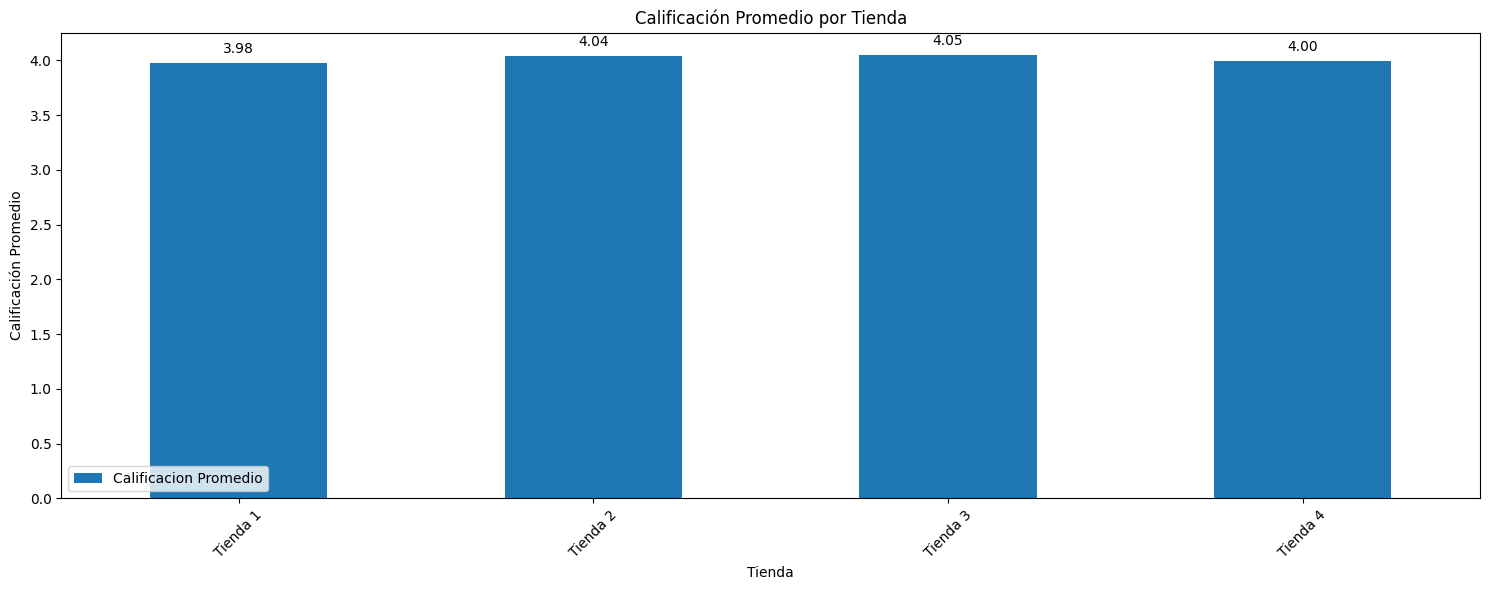

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

tien_das = {'Tienda 1': tienda1, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

# Diccionario para almacenar las calificaciones promedio de cada tienda
calificaciones_promedio = {}

for nombre_tienda, tienda in tien_das.items():
    calificaciones_promedio[nombre_tienda] = tienda['Calificación'].mean()

# Crear un DataFrame a partir del diccionario
df_calificaciones = pd.DataFrame.from_dict(calificaciones_promedio, orient='index', columns=['Calificacion Promedio'])

# Crear el gráfico de barras
ax = df_calificaciones.plot(kind='bar', figsize=(15, 6), width=0.5)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45)

# Agregar etiquetas de datos
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Formatea el valor a dos decimales
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')



plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [52]:
ventas_por_producto_tienda1 = tienda1.groupby('Producto').size()

productos_mas_vendidos_tienda1 = ventas_por_producto_tienda1.sort_values(ascending=False).head(5)
print("Top 5 productos más vendidos en la tienda 1:\n", productos_mas_vendidos_tienda1)

productos_menos_vendidos_tienda1 = ventas_por_producto_tienda1.sort_values(ascending=True).head(5)
print("Top 5 productos menos vendidos en la tienda 1:\n", productos_menos_vendidos_tienda1)

Top 5 productos más vendidos en la tienda 1:
 Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
dtype: int64
Top 5 productos menos vendidos en la tienda 1:
 Producto
Auriculares con micrófono      33
Celular ABXY                   33
Olla de presión                35
Pandereta                      36
Ciencia de datos con Python    39
dtype: int64


In [53]:
ventas_por_producto_tienda2 = tienda2.groupby('Producto').size()

productos_mas_vendidos_tienda2 = ventas_por_producto_tienda2.sort_values(ascending=False).head(5)
print("Top 5 productos más vendidos en la tienda 2:\n", productos_mas_vendidos_tienda2)

productos_menos_vendidos_tienda2 = ventas_por_producto_tienda2.sort_values(ascending=True).head(5)
print("Top 5 productos menos vendidos en la tienda 2:\n", productos_menos_vendidos_tienda2)

Top 5 productos más vendidos en la tienda 2:
 Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
dtype: int64
Top 5 productos menos vendidos en la tienda 2:
 Producto
Juego de mesa      32
Impresora          34
Mesa de comedor    34
Sillón             35
Auriculares        37
dtype: int64


In [54]:
ventas_por_producto_tienda3 = tienda3.groupby('Producto').size()

productos_mas_vendidos_tienda3 = ventas_por_producto_tienda3.sort_values(ascending=False).head(5)
print("Top 5 productos más vendidos en la tienda 3:\n", productos_mas_vendidos_tienda3)

productos_menos_vendidos_tienda3 = ventas_por_producto_tienda3.sort_values(ascending=True).head(5)
print("Top 5 productos menos vendidos en la tienda 3:\n", productos_menos_vendidos_tienda3)

Top 5 productos más vendidos en la tienda 3:
 Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
dtype: int64
Top 5 productos menos vendidos en la tienda 3:
 Producto
Bloques de construcción    35
Set de vasos               36
Mochila                    36
Microondas                 36
Vaso térmico               38
dtype: int64


In [55]:
ventas_por_producto_tienda4 = tienda4.groupby('Producto').size()

productos_mas_vendidos_tienda4 = ventas_por_producto_tienda4.sort_values(ascending=False).head(5)
print("Top 5 productos más vendidos en la tienda 4:\n", productos_mas_vendidos_tienda4)

productos_menos_vendidos_tienda4 = ventas_por_producto_tienda4.sort_values(ascending=True).head(5)
print("Top 5 productos menos vendidos en la tienda 4:\n", productos_menos_vendidos_tienda4)


Top 5 productos más vendidos en la tienda 4:
 Producto
Cama box                     62
Cubertería                   59
Cama king                    56
Dashboards con Power BI      56
Carrito de control remoto    55
dtype: int64
Top 5 productos menos vendidos en la tienda 4:
 Producto
Guitarra eléctrica             33
Armario                        34
Guitarra acústica              37
Ciencia de datos con Python    38
Lavadora de ropa               38
dtype: int64


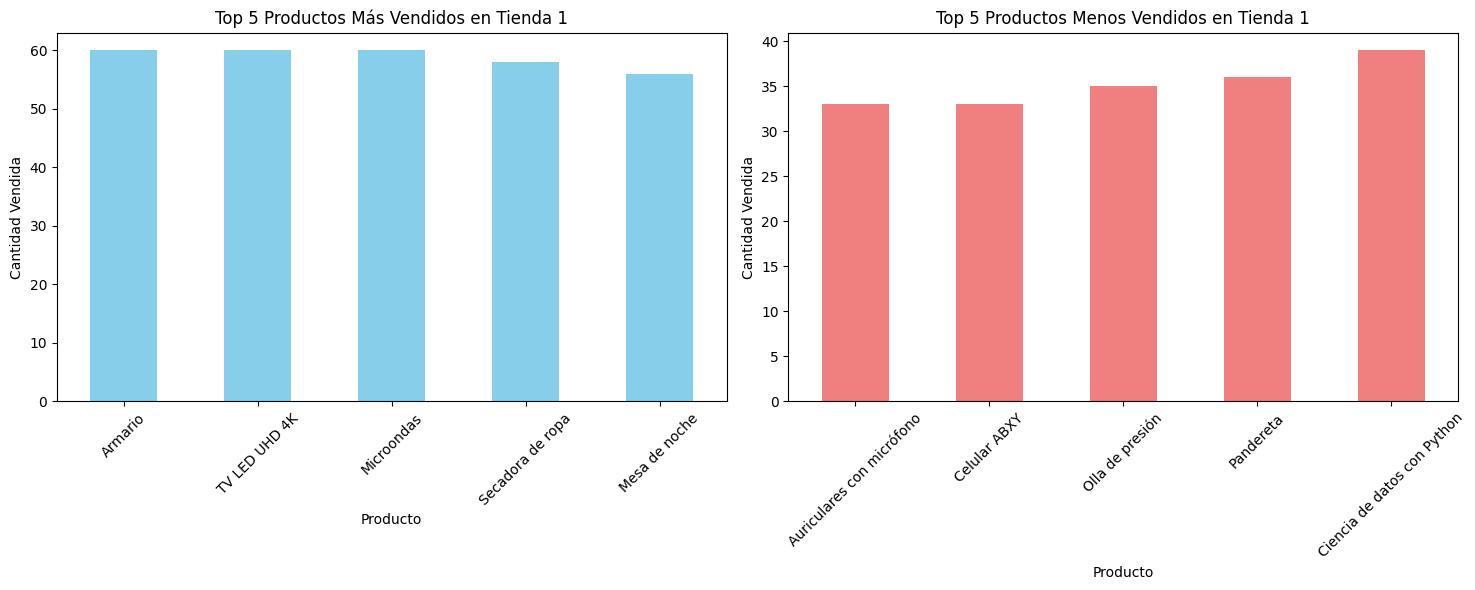

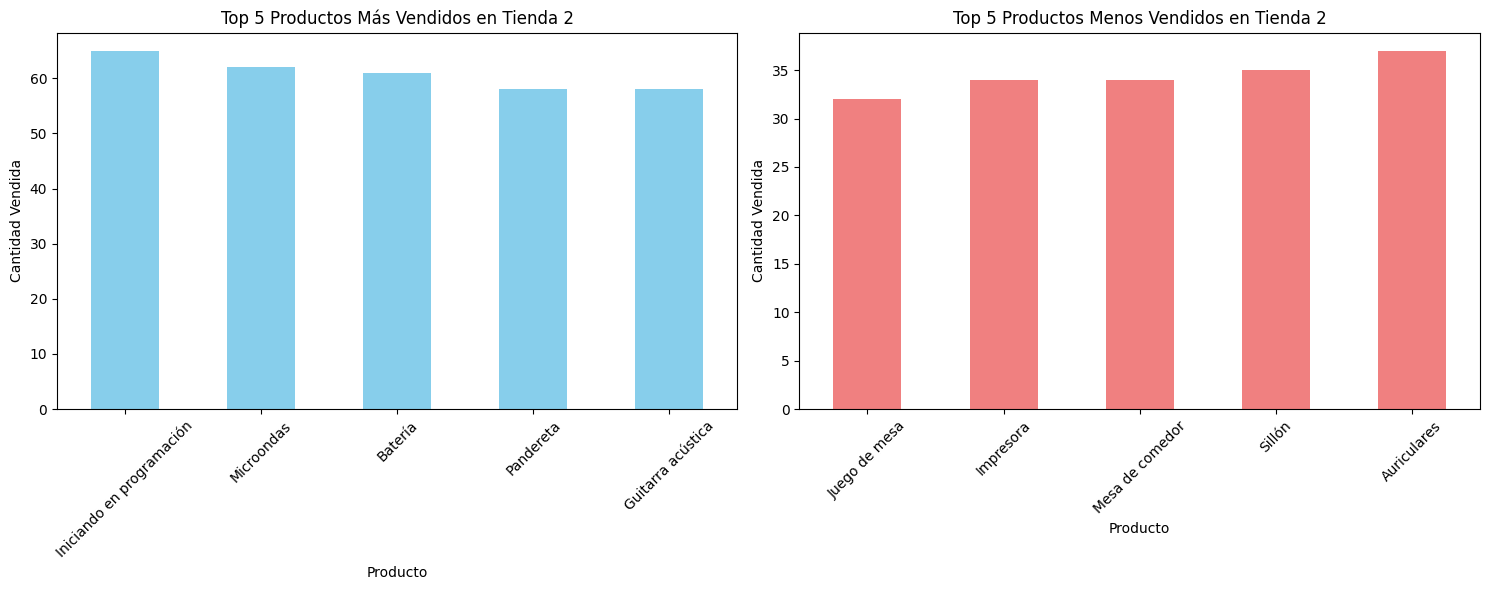

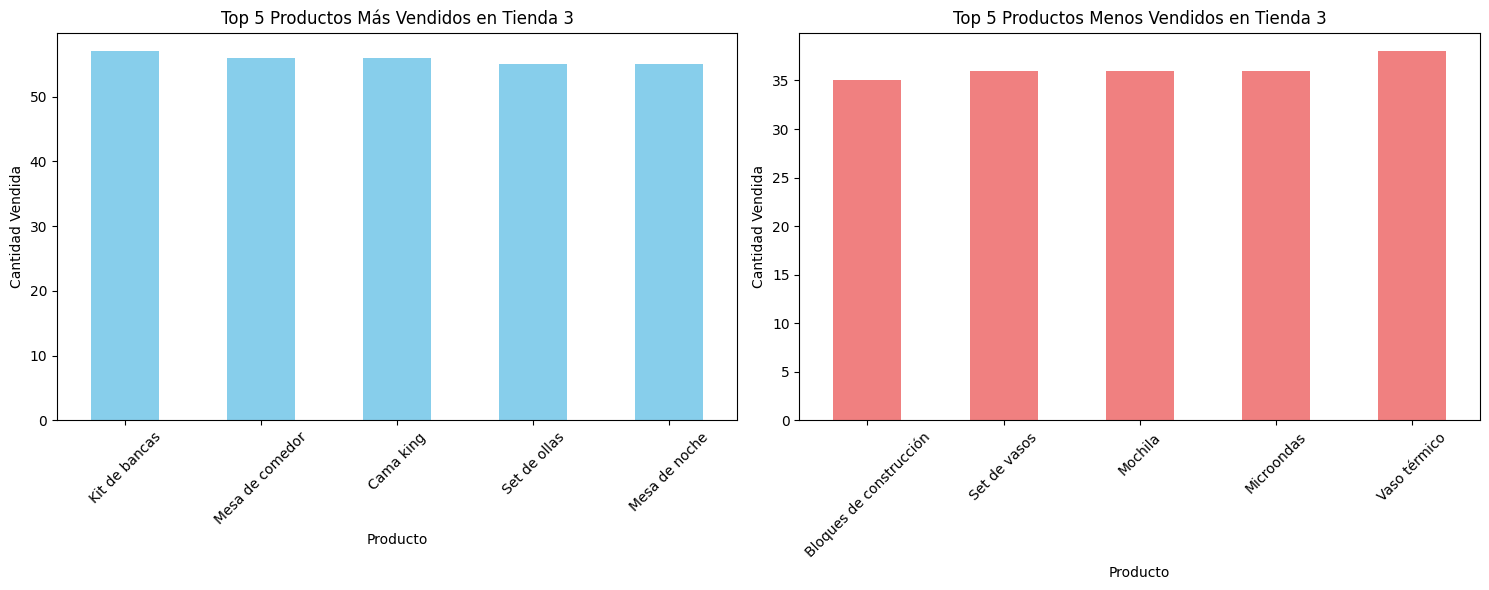

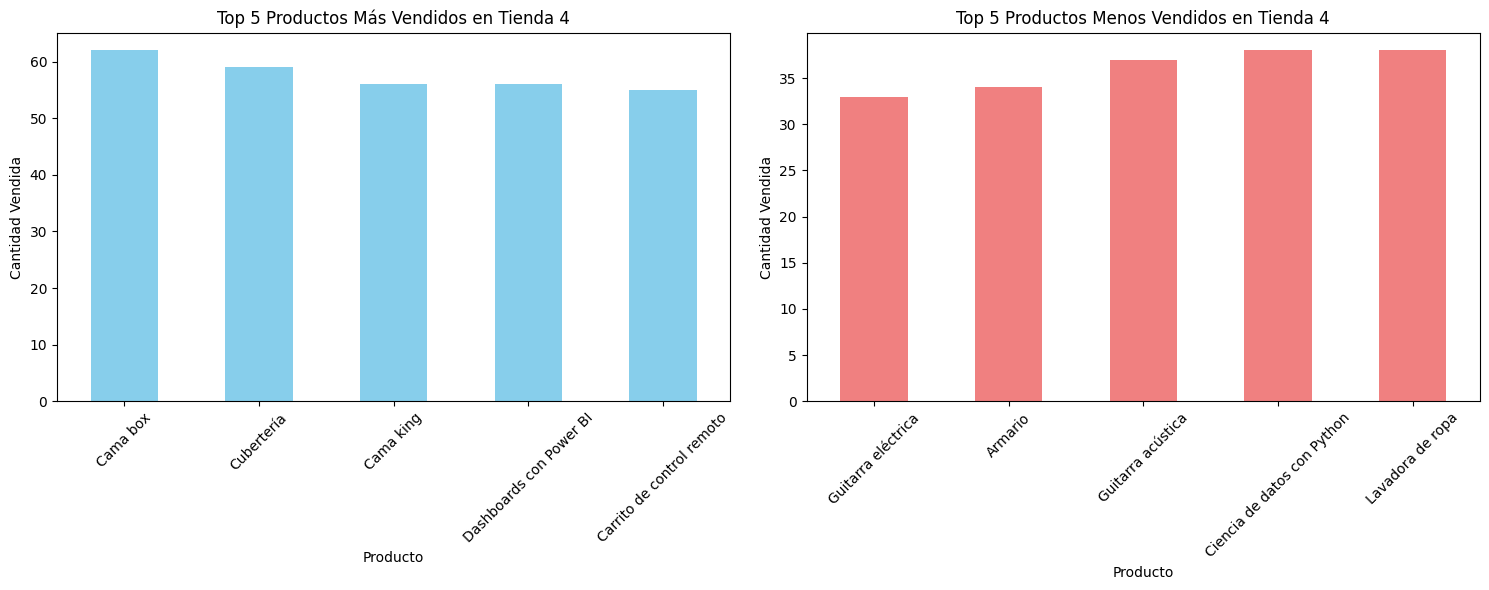

In [56]:

import matplotlib.pyplot as plt
import pandas as pd

tiendas = {'Tienda 1': tienda1, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

for nombre_tienda, tienda in tiendas.items():
    # Calcular ventas por producto
    ventas_por_producto = tienda.groupby('Producto').size()

    # Productos más vendidos
    productos_mas_vendidos = ventas_por_producto.sort_values(ascending=False).head(5)

    # Productos menos vendidos
    productos_menos_vendidos = ventas_por_producto.sort_values(ascending=True).head(5)

    # Crear subplots para los más y menos vendidos
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico de los productos más vendidos
    productos_mas_vendidos.plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title(f'Top 5 Productos Más Vendidos en {nombre_tienda}')
    axes[0].set_xlabel('Producto')
    axes[0].set_ylabel('Cantidad Vendida')
    axes[0].tick_params(axis='x', rotation=45)

    # Gráfico de los productos menos vendidos
    productos_menos_vendidos.plot(kind='bar', ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Top 5 Productos Menos Vendidos en {nombre_tienda}')
    axes[1].set_xlabel('Producto')
    axes[1].set_ylabel('Cantidad Vendida')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# 5. Envío promedio por tienda

In [59]:
tiendas = {'Tienda 1': tienda1, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

for nombre_tienda, tienda in tiendas.items():
    costo_envio_promedio = tienda['Costo de envío'].mean()
    print(f"Costo de envío promedio de {nombre_tienda}: {costo_envio_promedio:,.2f}")

Costo de envío promedio de Tienda 1: 26,018.61
Costo de envío promedio de Tienda 2: 25,216.24
Costo de envío promedio de Tienda 3: 24,805.68
Costo de envío promedio de Tienda 4: 23,459.46


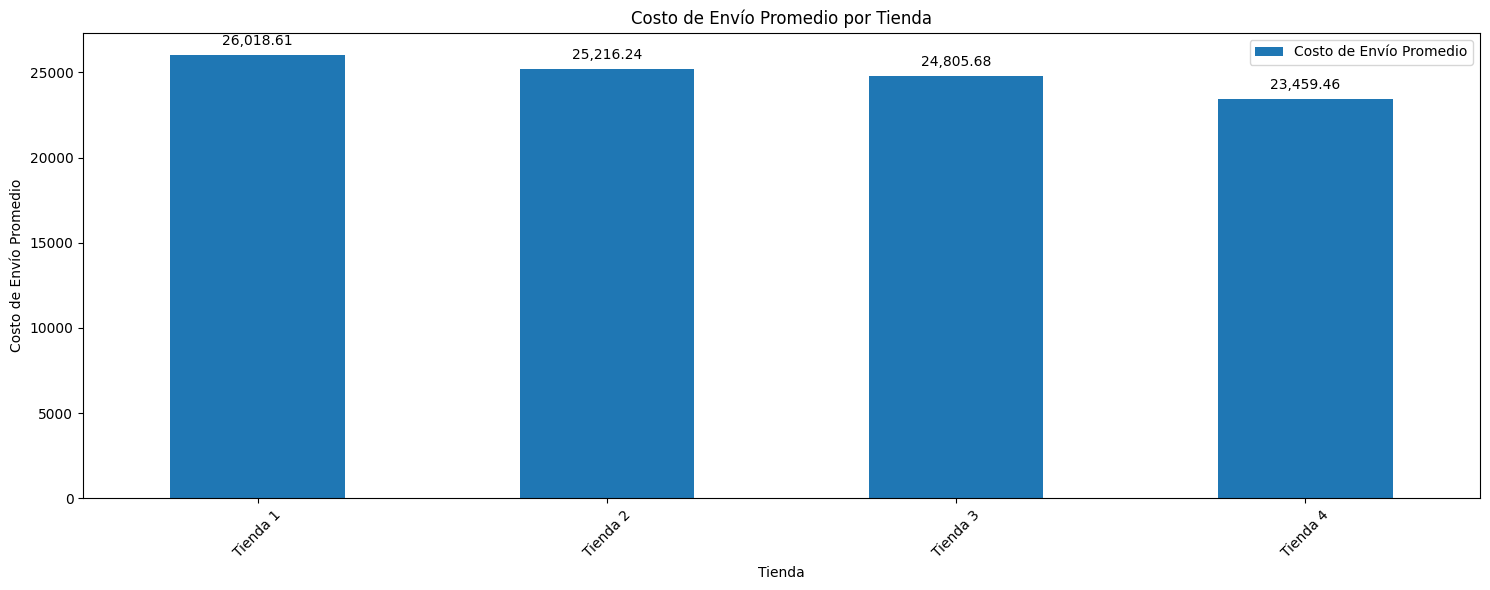

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

tiendas = {'Tienda 1': tienda1, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

# Diccionario para almacenar el valor de envío promedio de cada tienda
costo_envio_promedio = {}

for nombre_tienda, tienda in tiendas.items():
    costo_envio_promedio[nombre_tienda] = tienda['Costo de envío'].mean()

# Crear un DataFrame a partir del diccionario
df_envio = pd.DataFrame.from_dict(costo_envio_promedio, orient='index', columns=['Costo de Envío Promedio'])

# Crear el gráfico de barras
ax1 = df_envio.plot(kind='bar', figsize=(15, 6), width=0.5)
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.xticks(rotation=45)

# Agregar etiquetas de datos
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():,.2f}',  # Formatea el valor a dos decimales
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

#6. ¡Extra! Análisis del desempeño geográfico

In [ ]:
# Crear un gráfico de dispersión para la tienda 1
plt.figure(figsize=(20, 13))
plt.scatter(tienda1['lon'], tienda1['lat'], alpha=0.5)
plt.title('Distribución Geográfica de Ventas en la Tienda 1')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()

import folium

# Crear un mapa centrado en la ubicación promedio de las tiendas
mapa = folium.Map(location=[tienda1['lat'].mean(), tienda1['lon'].mean()], zoom_start=6)

# Agregar marcadores para cada venta en la tienda 1
for index, row in tienda1.iterrows():
    folium.Marker([row['lat'], row['lon']], popup=row['Producto']).add_to(mapa)

# Mostrar el mapa
mapa

In [ ]:
# Crear un gráfico de dispersión para la tienda 2
plt.figure(figsize=(20, 13))
plt.scatter(tienda2['lon'], tienda2['lat'], alpha=0.5)
plt.title('Distribución Geográfica de Ventas en la Tienda 2')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()

import folium

# Crear un mapa centrado en la ubicación promedio de las tiendas
mapa = folium.Map(location=[tienda2['lat'].mean(), tienda2['lon'].mean()], zoom_start=6)

# Agregar marcadores para cada venta en la tienda 2
for index, row in tienda2.iterrows():
    folium.Marker([row['lat'], row['lon']], popup=row['Producto']).add_to(mapa)

# Mostrar el mapa
mapa

In [ ]:
# Crear un gráfico de dispersión para la tienda 3
plt.figure(figsize=(20, 13))
plt.scatter(tienda3['lon'], tienda3['lat'], alpha=0.5)
plt.title('Distribución Geográfica de Ventas en la Tienda 3')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()

import folium

# Crear un mapa centrado en la ubicación promedio de las tiendas
mapa = folium.Map(location=[tienda3['lat'].mean(), tienda3['lon'].mean()], zoom_start=6)

# Agregar marcadores para cada venta en la tienda 3
for index, row in tienda3.iterrows():
    folium.Marker([row['lat'], row['lon']], popup=row['Producto']).add_to(mapa)

# Mostrar el mapa
mapa

In [ ]:
# Crear un gráfico de dispersión para la tienda 4
plt.figure(figsize=(20, 13))
plt.scatter(tienda4['lon'], tienda4 ['lat'], alpha=0.5)
plt.title('Distribución Geográfica de Ventas en la Tienda 4')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()

import folium

# Crear un mapa centrado en la ubicación promedio de las tiendas
mapa = folium.Map(location=[tienda4['lat'].mean(), tienda4['lon'].mean()], zoom_start=6)

# Agregar marcadores para cada venta en la tienda 4
for index, row in tienda4.iterrows():
    folium.Marker([row['lat'], row['lon']], popup=row['Producto']).add_to(mapa)

# Mostrar el mapa
mapa

# 7. Informe final

Es importante monitorizar a detalle las ventas para tomar decisiones e implementar estrategias que permitan mejorar los ingresos y la experiencia del cliente.
De acuerdo a lo anterior, se realiza un análisis de los ingresos totales de las tiendas, las categorías de productos más y menos vendidas, las calificaciones promedio de los clientes por tienda, los productos más y menos vendidos y el coste de envío promedio para cada tienda.

La participación de los ingresos por tienda se observa en el siguiente gráfico, donde la mayor participación la tiene la tienda 1 con el 26.1%, tienda 2 con 25.4%, menor % se tiene la tienda 3 con 24.9% y tienda 4 con 23.6%.

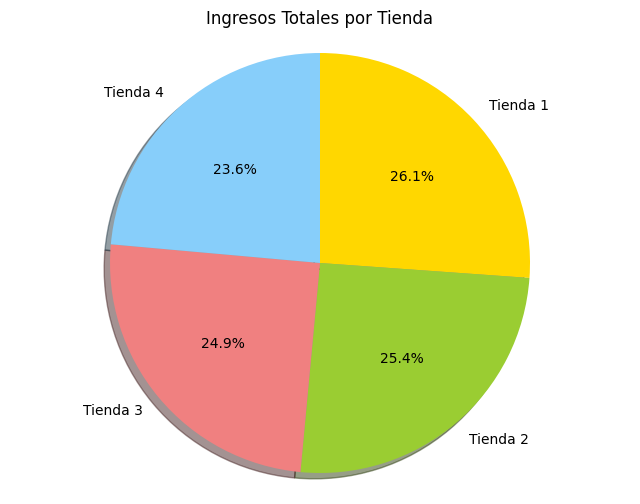

Las categorías con más cantidad de ventas son los Muebles, Electrónicos,
Juguetes, Electrodomésticos. Donde la cantidad de ventas es de 2359 para la tienda 1, 2 y 3, mientras que para tienda 4 de 2358.

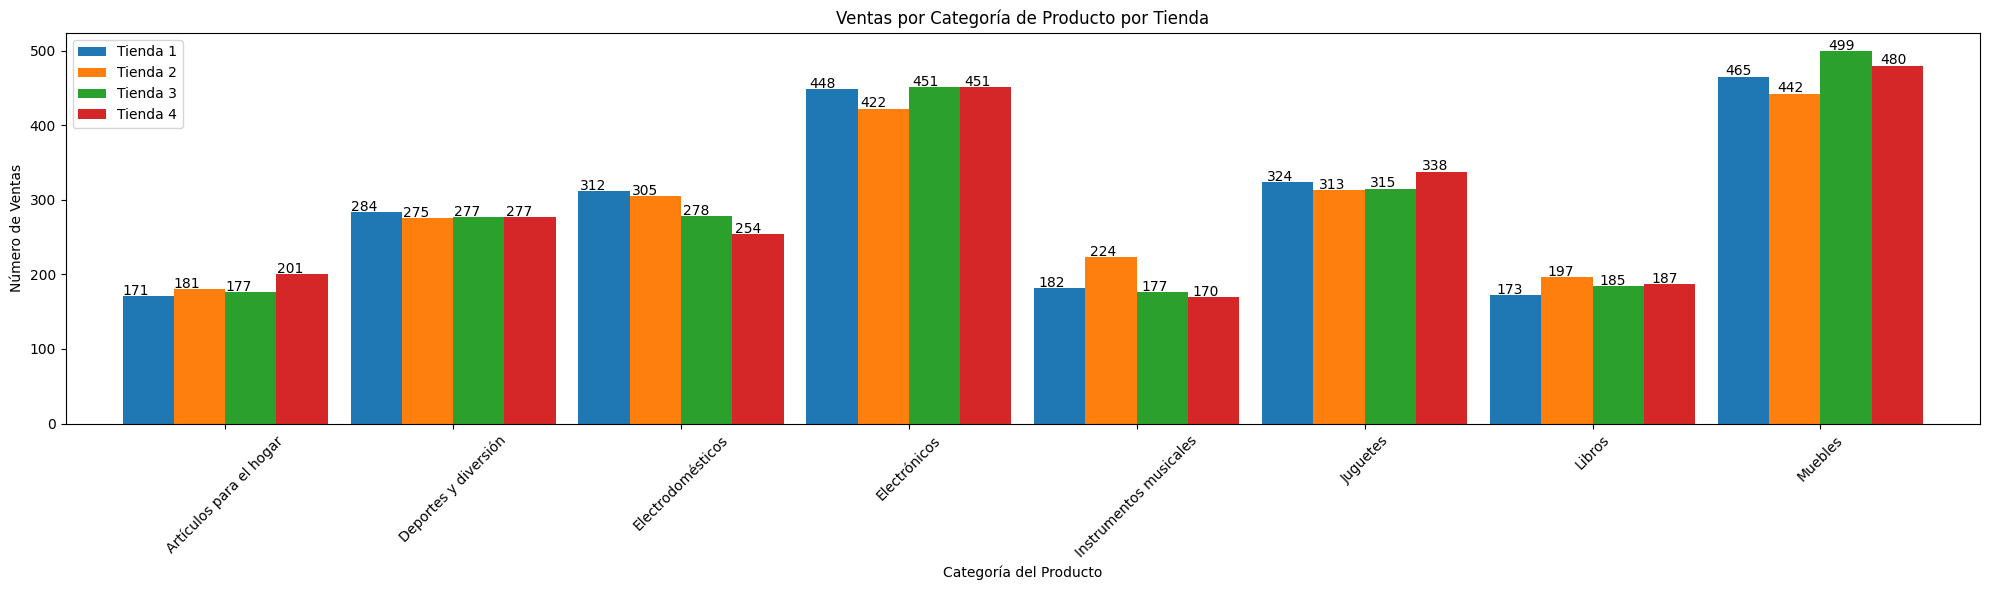

En cuanto a la calificación promedio se tiene 3.98 tienda 1, 4.04 tienda 2, 4.05 tienda 3 y 4.00 tienda 4, siendo calificaciones similares.

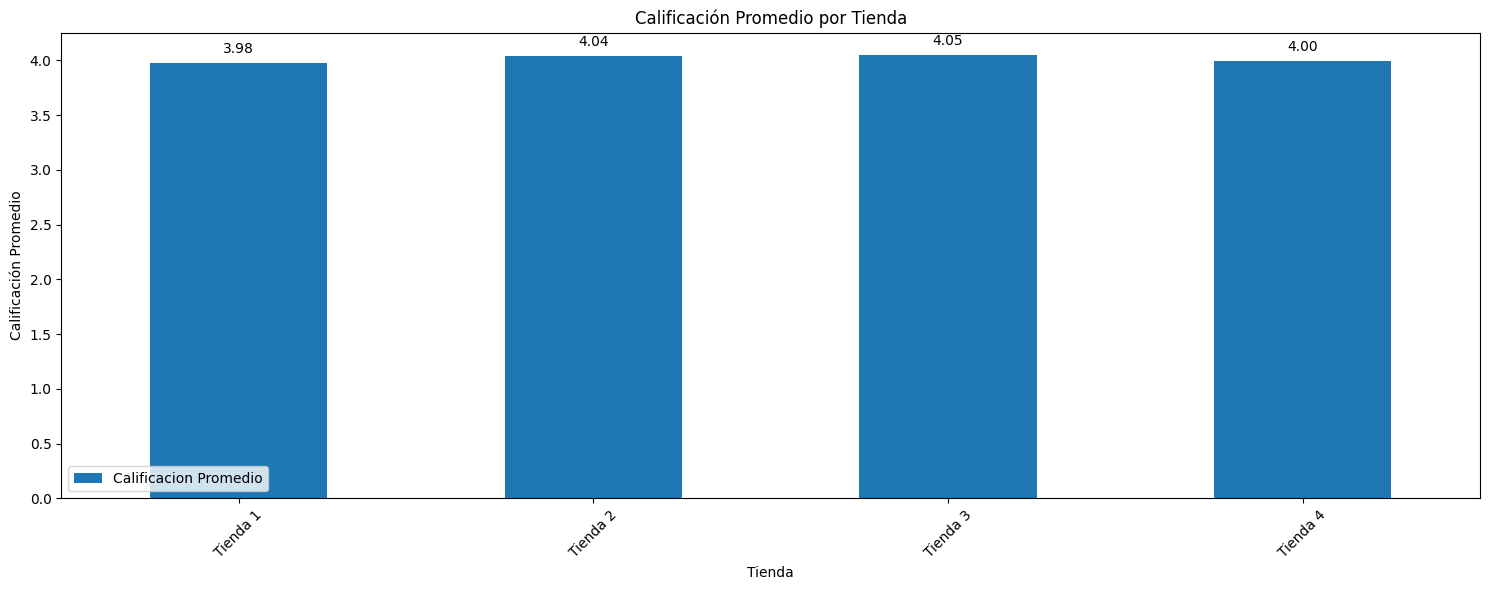

En la tienda 1 los 5 productos más vendidos son armario, TV Led, microondas, Secadora de ropa y mesa de noche.

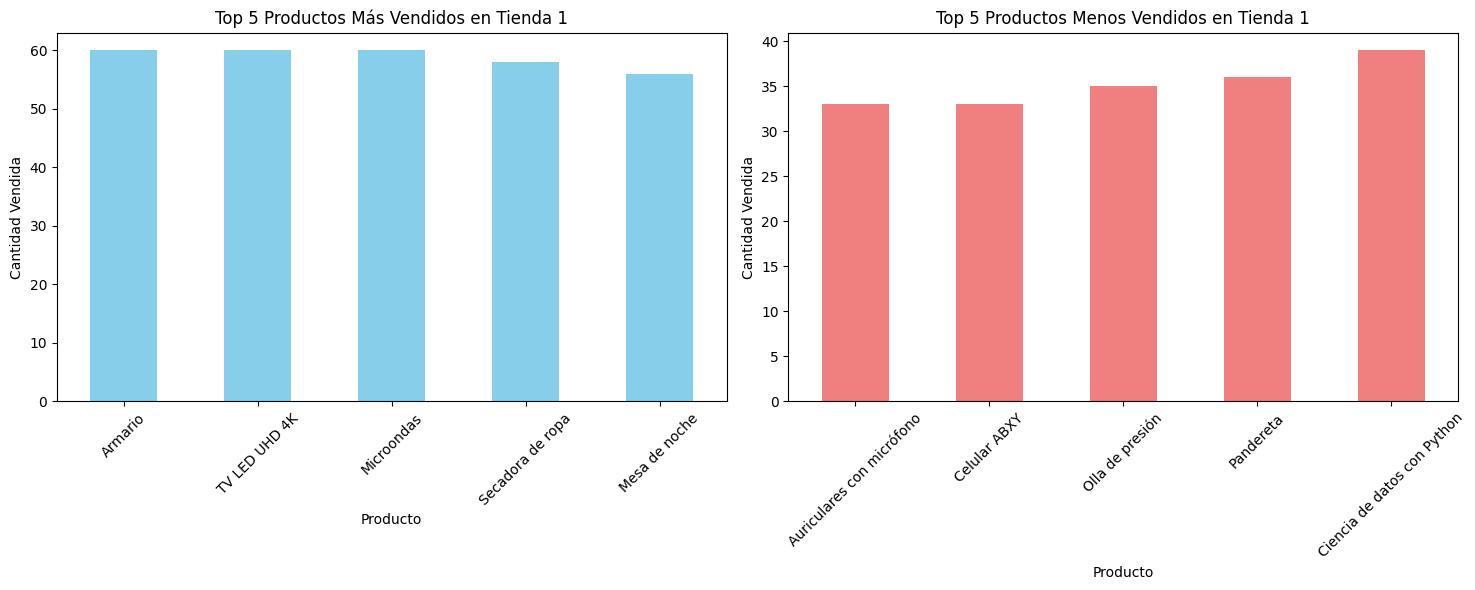

En la tienda 2 los 5 productos más vendidos son iniciando en programación, microondas, batería, pandereta y guitarra acústica.

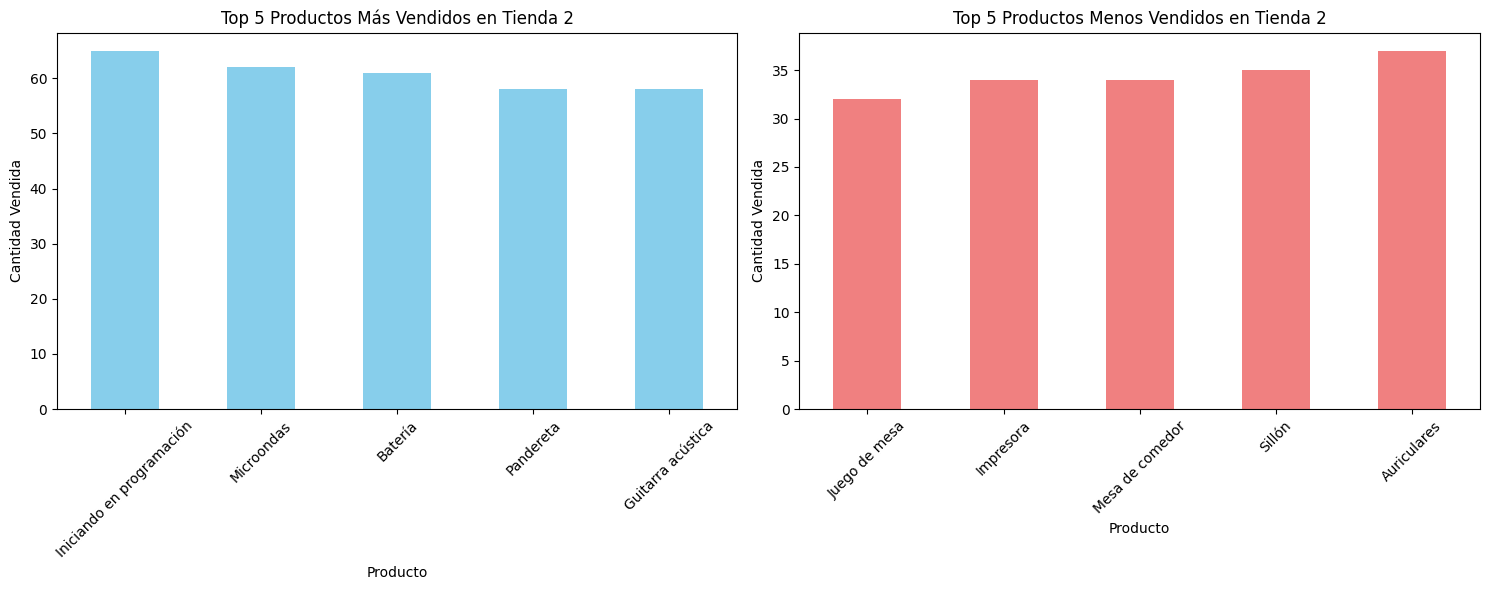

En la tienda 3 los 5 productos más vendidos son kit de bancas, mesa de comedor, cama king set de ollas y mesa de noche

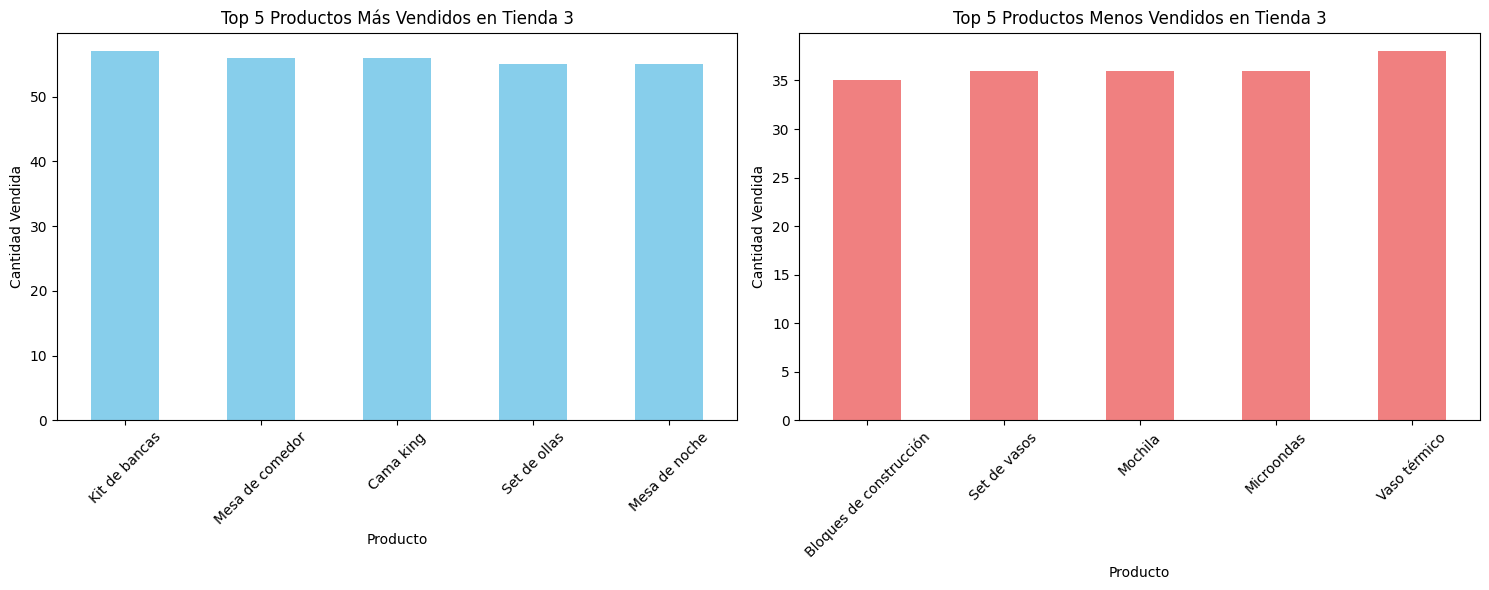

En la tienda 4 los 5 productos más vendidos son cama box, cubertería, cama king, dashboards con power BI y carrito de control remoto.

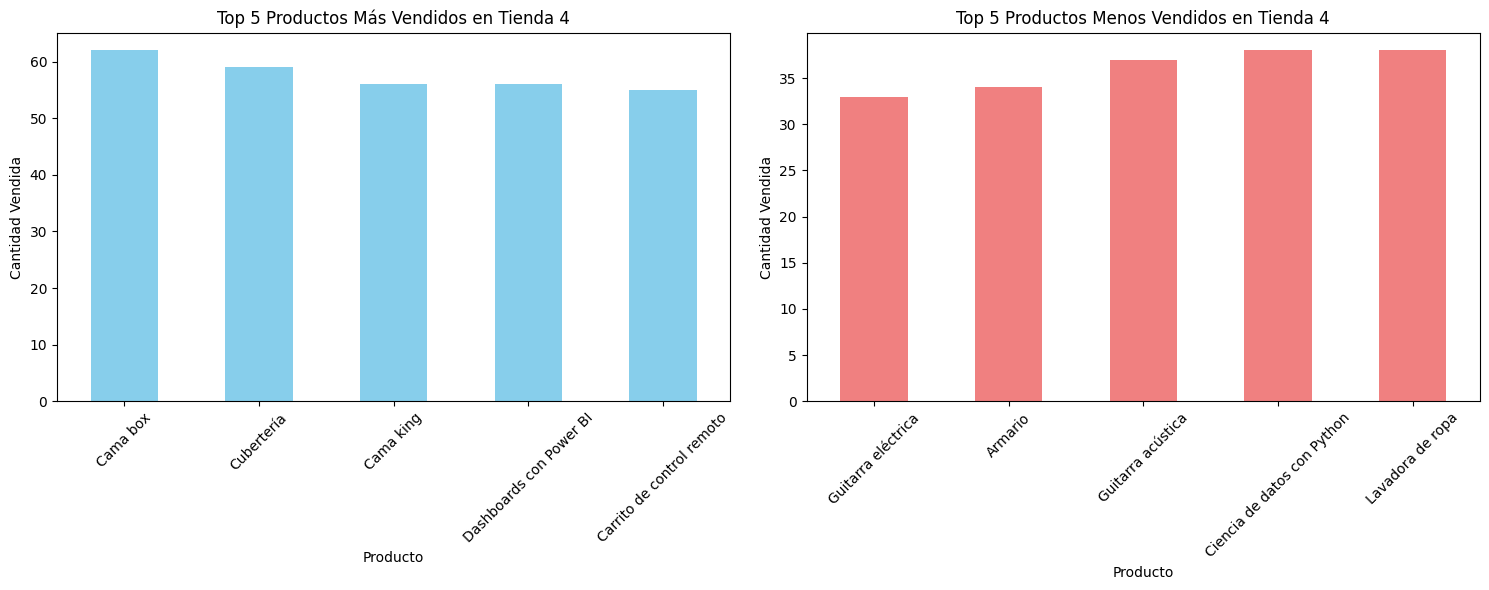

El valor de envío promedio máximo está en la tienda 1 con 26.018,61 y mínimo en la tienda 4 con 23.459,46

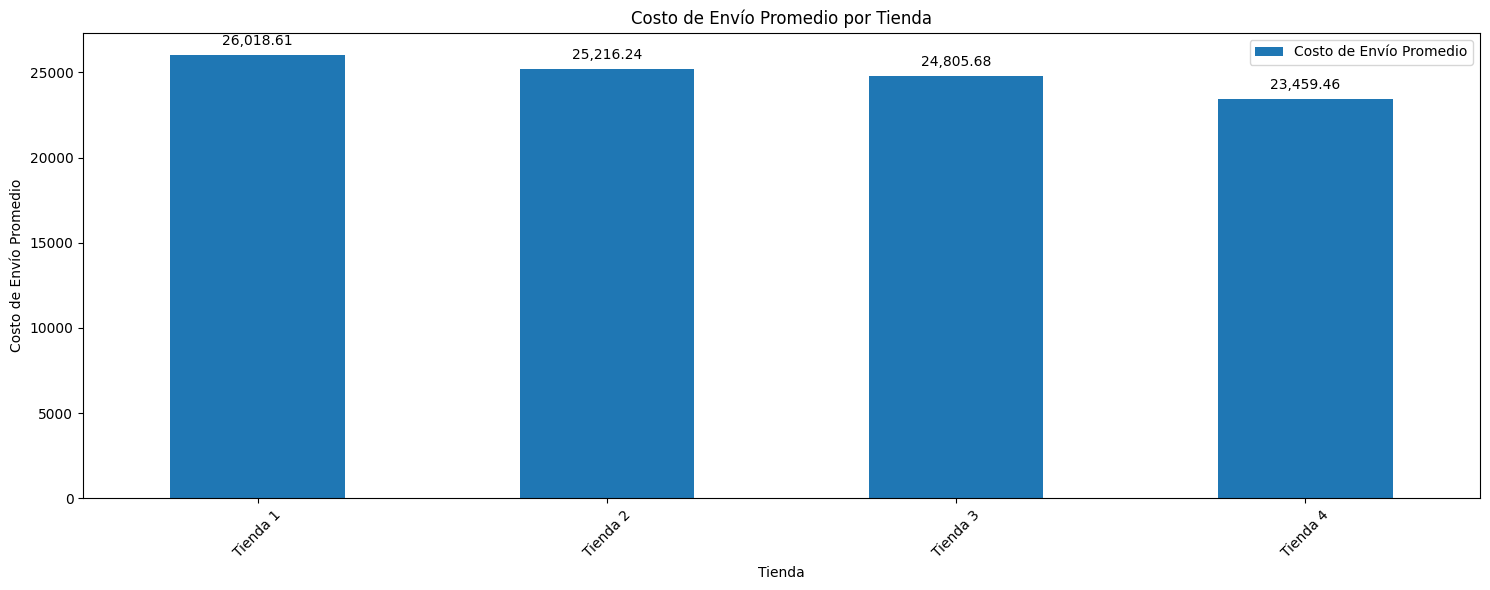

La distribución de las ventas geográficamente es similar para todas las tiendas, a través de todo el país, es decir, no están sectorizadas. Sin embargo, el tipo de producto vendido en cada lugar si varía, impactando en los ingresos totales de cada tienda.

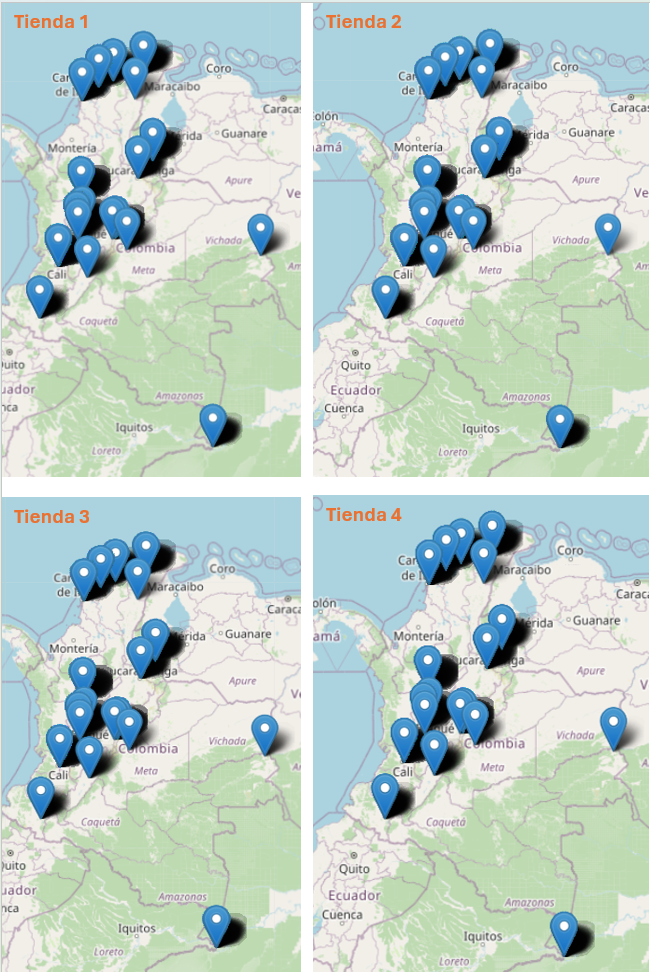

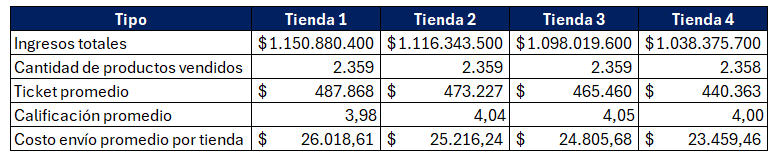

Finalmente, se observa que la tienda 4 tiene el menor desempeño respecto a las demás tiendas.
* Menores ingresos totales,con igual cantidad de ventas, implicando menor ticket promedio.
* Calificación promedio es similar a las otras tiendas, sin destacar en atención al cliente.